
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    ans: 調整 batch_size, epoch 目前觀察差異不大, 結果的變動反而跟建構網路層較有關係
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy
    ans: 結果沒什麼變動

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊 
# model = Sequential()

def Build_Model(model):
    #第二步：構建網絡層 
    model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   
    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  
    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  
    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  
    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    # 第三步：編譯
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
def Print_Model(model):
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())
    # 輸出模型摘要資訊
    model.summary()

In [ ]:
'''
SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


In [4]:
#  第四步：資料分割
# 使用 Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [5]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [6]:
# 第六步：輸出
def Print_Result(X_test, Y_test, model):
    print ( " test set " )
    scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
    print ( "" )
    #print ( " The test loss is %f " % scores)
    print ( " The test loss is %f ", scores)
    result = model.predict(X_test,batch_size=200,verbose= 0)
    result_max = numpy.argmax(result, axis = 1 )
    test_max = numpy.argmax(Y_test, axis = 1 )
    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ( "" )
    print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

In [7]:
# 第七步：繪圖
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

def Draw(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [8]:
model = Sequential()
Build_Model(model)
'''
batch_size：對總的樣本數進行分組，每組包含的樣本數量
epochs ：訓練次數
'''
batch_size = 128
epochs = 20
history_1 = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

W0712 23:55:06.660953  6644 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 23:55:06.661924  6644 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 23:55:06.663919  6644 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 23:55:06.705808  6644 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 23:55:06.718773  6644 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 5s - loss: 2.8078 - acc: 0.8245 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 2/20
 - 5s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 3/20
 - 5s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 4/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 5/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 6/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 7/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 8/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 9/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 10/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 11/20
 - 6s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 12/20
 - 6s - loss: 2.8847 - 

In [9]:
Print_Result(X_test, Y_test, model)

 test set 

 The test loss is %f  [2.882557134628296, 0.8201799476146698]

 The accuracy of the model is 0.100900 


In [10]:
model = Sequential()
Build_Model(model)
'''
batch_size = 32
epochs = 2
'''
batch_size = 32
epochs = 2
history_2 = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
 - 13s - loss: 2.8888 - acc: 0.8198 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/2
 - 12s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201


In [11]:
Print_Result(X_test, Y_test, model)

 test set 

 The test loss is %f  [2.87518328666687, 0.8206399428844452]

 The accuracy of the model is 0.103200 


In [12]:
model = Sequential()
Build_Model(model)
'''
batch_size = 64
epochs = 10
'''
batch_size = 64
epochs = 10
history_3 = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 11s - loss: 2.8695 - acc: 0.8208 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 2/10
 - 10s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 3/10
 - 10s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 4/10
 - 10s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 5/10
 - 10s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 6/10
 - 9s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 7/10
 - 8s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 8/10
 - 8s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 9/10
 - 8s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 10/10
 - 8s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207


In [13]:
Print_Result(X_test, Y_test, model)

 test set 

 The test loss is %f  [2.882236533164978, 0.820199943780899]

 The accuracy of the model is 0.101000 


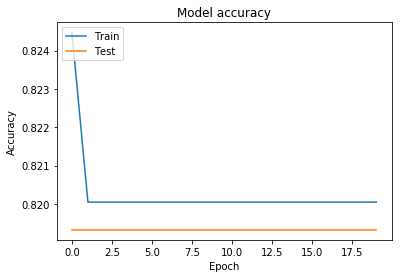

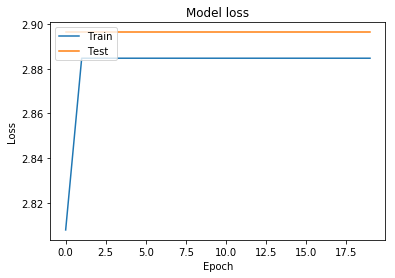

In [14]:
Draw(history_1)

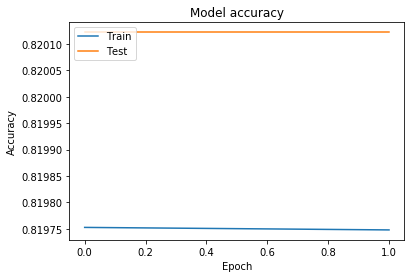

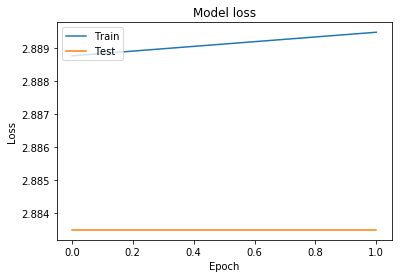

In [15]:
Draw(history_2)

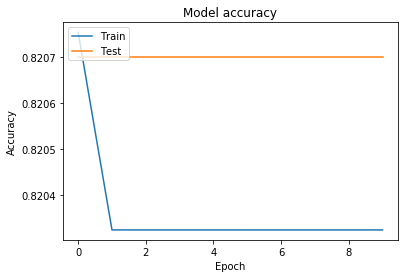

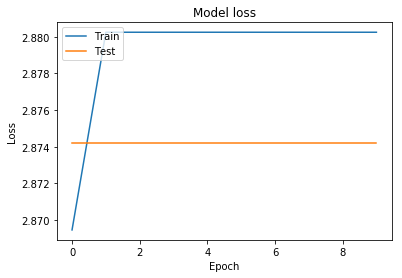

In [16]:
Draw(history_3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 2/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 3/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 4/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 5/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 6/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 7/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 8/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 9/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 10/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035


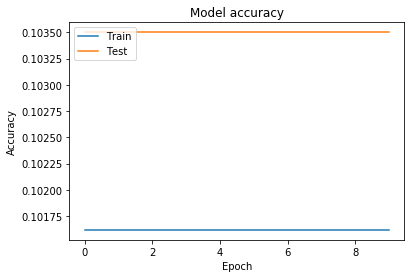

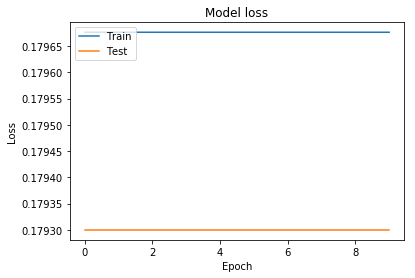

In [17]:
# 以同一模型,驗證 SGD
batch_size = 64
epochs = 10

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['accuracy'])
history_4 = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True, verbose=2, validation_split=0.3)
Draw(history_4)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 2/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 3/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 4/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 5/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 6/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 7/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 8/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 9/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 10/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035


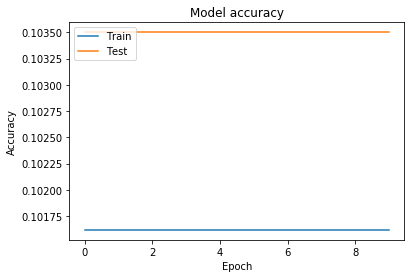

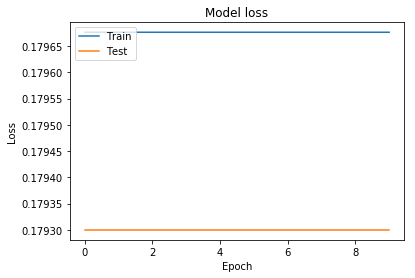

In [20]:
# 以同一模型,驗證 Adam
opt = optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=opt, metrics = ['accuracy']) 
history_5 = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True, verbose=2, validation_split=0.3)
Draw(history_5)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 2/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 3/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 4/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 5/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 6/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 7/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 8/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 9/10
 - 7s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035
Epoch 10/10
 - 6s - loss: 0.1797 - acc: 0.1016 - val_loss: 0.1793 - val_acc: 0.1035


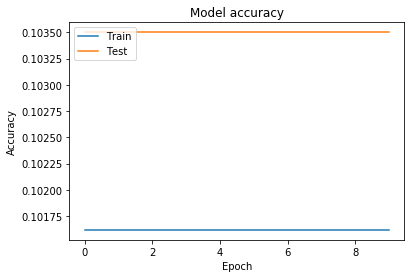

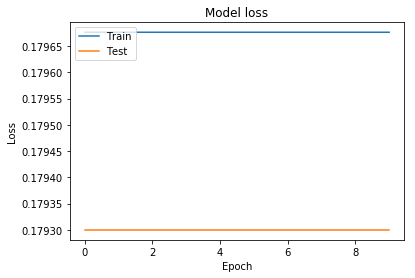

In [21]:
# 以同一模型,驗證 Rmsprop
opt = optimizers.RMSprop(lr=0.1, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=opt, metrics = ['accuracy'])
history_6 = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True, verbose=2, validation_split=0.3)
Draw(history_6)